<h1 align=center style="font-family: 'Times New Roman', sans-serif">Análisis Exploratorio de Datos</h1>
<h2 align=center style="font-family: 'Times New Roman', sans-serif"> Accidentes Aereos - Data Analtytics </h2>

<h>En este notebook vamos a hacer un análisis de datos de <a href="AccidentesAviones.csv">Accidentes Aviones.csv</a> para intentar encontrar patrones, nulos, faltantes, registros duplicados o variables insignificantes que no brinden información relevante al proyecto. </h>

Para iniciar este notebook hay que importar las librerías que utilizaremos y abrir el archivo <em>.csv</em> que analizaremos.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')
import re, datetime
from collections import Counter
from nltk.corpus import stopwords

Abrimos el archivo <em>csv</em> de la siguiente manera.

In [37]:
df = pd.read_csv("./AccidentesAviones.csv")

Veamos como inicia el dataset.

In [5]:
df.head()

,Fecha,Hora Declarada,Ruta,Operador,Número de Vuelo,Ruta de Vuelo,Tipo de Aeronave,Registro,CN LN,Total a Bordo,Pasajeros a Bordo,Tripulación a Bordo,Cantidad de Fallecidos,Fallecidos Pasajeros,Fallecidos Tripulación,En Tierra,Resumen
0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...
3,"August 06, 1913",?,"Victoria, British Columbia, Canada",Private,?,?,Curtiss seaplane,?,?,1,0,1,1,0,1,0,The first fatal airplane accident in Canada oc...
4,"September 09, 1913",1830,Over the North Sea,Military - German Navy,?,?,Zeppelin L-1 (airship),?,?,20,?,?,14,?,?,0,The airship flew into a thunderstorm and encou...


<hr>
<h2 align=center style="font-family: 'Times New Roman', sans-serif">Contenido</h2>

<ul>
    <li>
        <a href="#duplicates">Duplicados</a>
    </li>
    <li>
        <a href="#nulos">Valores nulos o faltantes</a>
    </li>
    <li>
        <a href="#outliers">Valores atípicos</a>
    </li>
    <li>
        <a href="#graph">Análisis de las variables</a>
    </li>
</ul>

<hr>

<h3 id="#duplicates" align=center style="font-family: 'Times New Roman', sans-serif; text-decoration: underline">Duplicados</h3>

Para poder trabajar con este dataframe, debemos eliminar los valores duplicados para que no perjudiquen los análisis. Eliminamos los valores duplicados en la siguiente línea.

In [6]:
print(f"Cantidad de registros sin eliminar duplicados: {len(df)}.") # Imprimimos por pantalla la cantidad de registros antes de eliminar duplicados
df.drop_duplicates() # Eliminamos los valores duplicados
print(f"Cantidad de registros habiendo eliminado duplicados: {len(df)}.") # Imprimimos la cantidad de registros sin los duplicados

Cantidad de registros sin eliminar duplicados: 5008.
Cantidad de registros habiendo eliminado duplicados: 5008.


Podemos ver que en este dataframe no contiene registros duplicados, por lo que podemos proseguir con los análisis.

<hr>

<h3 id="#nulos" align=center style="font-family: 'Times New Roman', sans-serif; text-decoration: underline">Valores nulos y faltantes</h3>

Observemos que en este dataframe los valores nulos o faltantes no están escritos de la manera tradicional.

In [7]:
df.isnull().sum()

Fecha                     0
Hora Declarada            0
Ruta                      0
Operador                  0
Número de Vuelo           0
Ruta de Vuelo             1
Tipo de Aeronave          0
Registro                  0
CN LN                     0
Total a Bordo             0
Pasajeros a Bordo         0
Tripulación a Bordo       0
Cantidad de Fallecidos    0
Fallecidos Pasajeros      0
Fallecidos Tripulación    0
En Tierra                 0
Resumen                   0
dtype: int64

Si buscamos los valores faltantes de esta manera, podríamos caer en la conclusión errónea que el dataframe no tiene valores faltantes, exceptuando al único de la columna <em>Ruta de Vuelo</em>. Para poder hacer la búsqueda concreta de valores faltantes debemos ver alguna parte del dataframe.

In [8]:
df.iloc[102:106] # Visualizamos una parte cualquiera del dataframe

,Fecha,Hora Declarada,Ruta,Operador,Número de Vuelo,Ruta de Vuelo,Tipo de Aeronave,Registro,CN LN,Total a Bordo,Pasajeros a Bordo,Tripulación a Bordo,Cantidad de Fallecidos,Fallecidos Pasajeros,Fallecidos Tripulación,En Tierra,Resumen
102,"September 03, 1925",0530,"Caldwell, Ohio",Military - U.S. Navy,?,"Lakehurst, NJ - S.t Louis, MO",Dirigible ZR-1 Shenandoah (airship),ZR-1,?,43,0,43,14,0,14,0,The Shenandoah was flying over Southern Ohio w...
103,"September 07, 1925",?,"Toul, France",CIDNA,?,?,Spad 33,?,?,?,?,?,?,?,?,?,?
104,"October 01, 1925",?,"Mt. Nittany, Ohio",US Aerial Mail Service,?,New York - San Francisco,De Havilland DH-4,385,?,1,0,1,1,0,1,0,Crashed into a wooded area on Mt. Nittany in f...
105,"November 14, 1925",?,"Nouadhibou, Mauritania",Lignes Aeriennes Latecoere,?,?,Breguet 14,F-AEGZ,168,1,0,1,1,0,1,0,The pilot suffered sunstroke lost control of t...


Como podemos ver, en los registros hay valores <h style='color: #FFFF00'>'?'</h> que representa la ausencia de información en ese registro. Con este nuevo panorama, busquemos los <h style="color: #FFAB00">'?'</h> en el dataframe.

In [9]:
df.isin(["?"]).sum() # Analizamos la suma de las columnas donde aparece el valor "?"

Fecha                        0
Hora Declarada            1504
Ruta                         5
Operador                    10
Número de Vuelo           3682
Ruta de Vuelo              762
Tipo de Aeronave            13
Registro                   272
CN LN                      667
Total a Bordo               17
Pasajeros a Bordo          221
Tripulación a Bordo        219
Cantidad de Fallecidos       8
Fallecidos Pasajeros       235
Fallecidos Tripulación     235
En Tierra                   44
Resumen                     59
dtype: int64

Ahora podemos observar correctamente la cantidad de valores faltantes que tiene cada columna del dataframe.

Podemos ver en que posiciones están los valores faltantes en el siguiente gráfico.

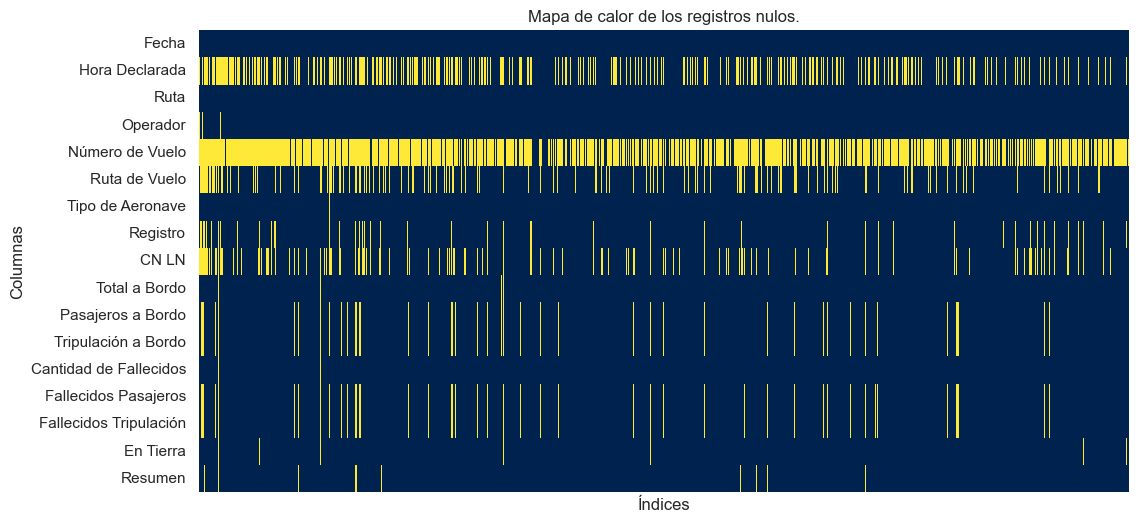

In [10]:
nulls_heatmap_df = df.isin(["?"]) # Definimos nuestra matriz que graficaremos.

plt.figure(figsize=(12,6))  # Definimos el tamaño de la figura que graficaremos

sns.heatmap(nulls_heatmap_df.T, cmap='cividis', cbar=False) # Graficamos el mapa de calor con la matrix que definimos antes.

plt.title("Mapa de calor de los registros nulos.") # Colocamos el título
plt.ylabel("Columnas") # Colocamos el texto lateral
plt.xlabel("Índices") # Colocar el texto inferior
plt.xticks([]) # Quitamos todos los índices del dataframe que no prporcionan información relevante

plt.show() # Mostramos el gráfico

Al observar las líneas amarillas, que representan los valores nulos, podemos observar que existe una relación en los valores nulos de las columnas con la información de los pasajeros. Quiere decir que, normalmente, cuando no contiene información de una de las columnas, las otras tampoco contendrán información. Esto sucede con las columnas <h style="color: #23fce1">'Pasajeros a Bordo', 'Tripulación a Bordo', 'Fallecidos Pasajeros' y 'Fallecidos Tripulación'</h>.

Para aligerar el tratamiento de los valores faltantes, vamos a transformar los <h style="color: #FFAB00">"?"</h> en los valores nulos más tradicionales.

In [41]:
df.replace("?", None, inplace=True) # Reemplazamos los valores "?" con valores None.

<hr>
<h3 id="#outliers" align=center style="font-family: 'Times New Roman', sans-serif; text-decoration: underline">Valores atípicos</h3>

Los valores atípicos son datos extremos de la distribución que pueden afectar los análisis por sus valores alejados de los promedios o medianas. Estos valores pueden deberse a varios factores como eventos únicos en su clase, error humano al guardar la información, entre otros. A continuación buscaremos estos valores atípicos.

Para comenzar vamos a analizar las fechas de los accidentes.

In [12]:
list_fechas = [] # Creamos una lista vacía donde irán las fechas procesadas con datetime.strptime
for date in df['Fecha']: # Iteramos las fechas
    try: # Intentar
        fecha = datetime.datetime.strptime(date, "%B %d, %Y") # Convertir la cadena en un datetime
        list_fechas.append(fecha) # Lo agregan a la lista
    except ValueError: # Si ocurre un ValueError
        print(f"'{date}' No es un valor válido para datetime.") # Imprime la fecha que produce el error

df['Fecha Procesada'] = list_fechas # Iniciar la columna 'Fecha Procesada' con la lista de fechas

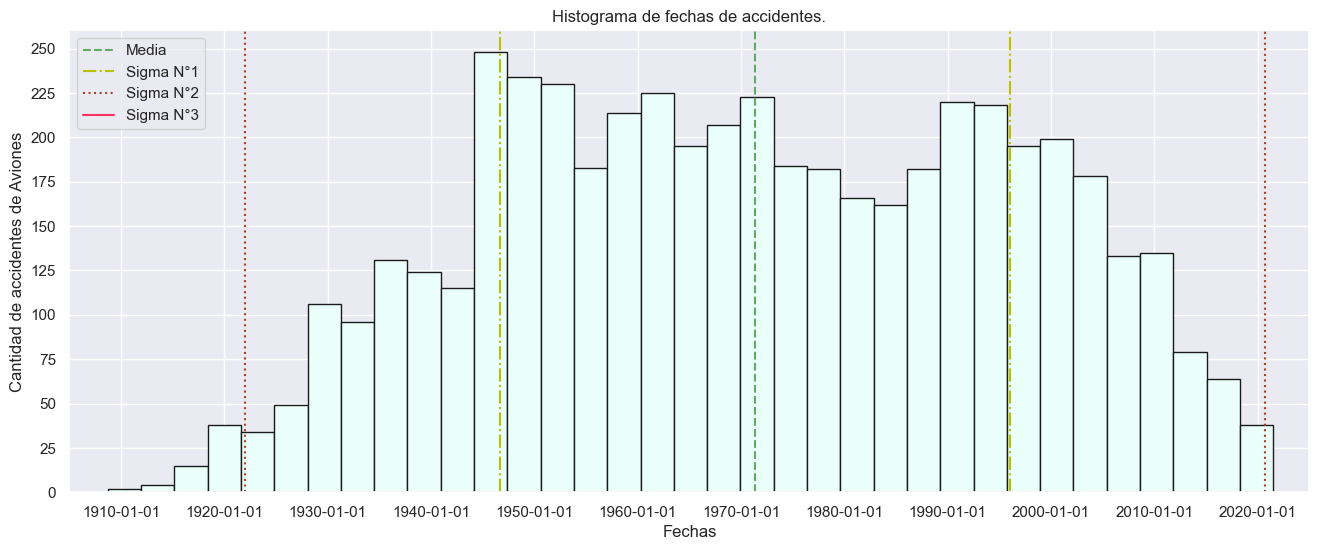

In [13]:
media = np.mean(df['Fecha Procesada']) # La media de las fechas procesada
std = np.std(df['Fecha Procesada']) # La desviación Estándar

plt.figure(figsize=(16,6)) # Definimos el tamaño de la figura

plt.hist(df['Fecha Procesada'], bins= 35, color='#eafefa', edgecolor='k') # Creamos el histograma

plt.xticks([datetime.datetime.strptime(str(year) + '-01-01', "%Y-%m-%d") for year in np.arange(1910, 2021, 10)]) # Definimos los valores que se verán en el eje X
plt.yticks(np.arange(0, 251, 25)) # Definimos los valores que se verán en el eje Y

plt.xlim(datetime.datetime.strptime("1905-01-01", "%Y-%m-%d"), datetime.datetime.strptime("2025-01-01", "%Y-%m-%d")) # Definimos los límites del gráfico en el eje X

# Definimos las líneas que representan los valores de las tres sigmas
plt.axvline(media, color='#61AA61', linestyle='--', label= "Media")
plt.axvline(media + std, color= "#B9C101", linestyle= '-.', label= "Sigma N°1")
plt.axvline(media + std * 2, color= "#A64421", linestyle=":", label="Sigma N°2")
plt.axvline(media + std * 3, color= "#FF3161", linestyle="-", label="Sigma N°3")
plt.axvline(media - std, color= "#B9C101", linestyle= '-.')
plt.axvline(media - std * 2, color= "#A64421", linestyle=":")
plt.axvline(media - std * 3, color= "#FF3161", linestyle="-")

# Colocamos el título y las etiquetas
plt.title("Histograma de fechas de accidentes.")
plt.xlabel("Fechas")
plt.ylabel("Cantidad de accidentes de Aviones")


plt.legend() # Mostramos las legendas
plt.show() # Mostrar el gráfico

Como nos muestra el histograma de fechas, no existen accidentes en fechas atípicas. Quedan todas las fechas incluidas dentro de las tres sigmas.

Continuemos con la columna de <em>Total a Bordo</em>.

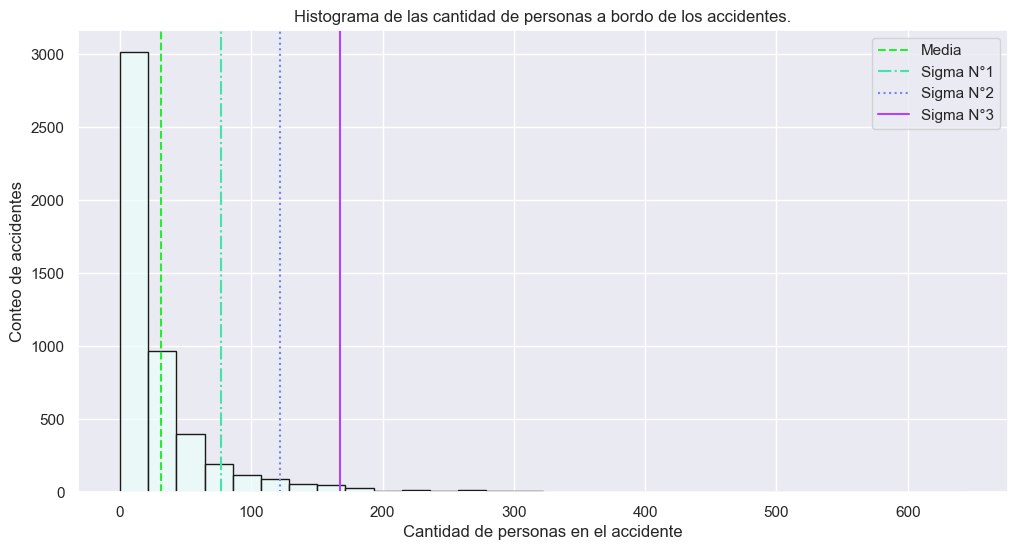

In [14]:
# Define los valores enteros no nulos de la columna 'Total a Bordo'
totalP = [int(x) for x in df['Total a Bordo'] if x != None]

# Declarar la media y la desviación estandar de la columna 'Total a Bordo'
media = np.mean(totalP)
std = np.std(totalP)

plt.figure(figsize=(12,6)) # Definir el tamaño de gráfico

sns.histplot(totalP, color='#eafeFa', bins= 30, edgecolor= 'k') # Crear el gráfico 

# Crear el título y las etiquetas
plt.title("Histograma de las cantidad de personas a bordo de los accidentes.")
plt.xlabel("Cantidad de personas en el accidente")
plt.ylabel("Conteo de accidentes")

# Creamos las líneas de las sigmas.
plt.axvline(media, color="#22ef31", linestyle="--", label="Media")
plt.axvline(media + std, color="#42e5a7", linestyle="-.", label="Sigma N°1")
plt.axvline(media + std * 2, color="#7285f1", linestyle=":", label="Sigma N°2")
plt.axvline(media + std * 3, color="#b242fe", linestyle="-", label="Sigma N°3")

# Mostrar las legendas
plt.legend()
# Mostrar el gráfico
plt.show()

El histograma dice que existen algunos accidentes en los que hubo más de 200 personas involucradas en accidentes, lo que constituye valores "atípicos". Estos valores atípicos pueden ser irrelevantes debido a que la cantidad de personas que viajan es relativamente aleatorio.

<hr>
<h3 id="#graph" align=center style="font-family: 'Times New Roman', sans-serif; text-decoration: underline">Análisis de las variables</h3>

En esta sección, con ayuda de los gráficos, vamos a indagar en posibles patrones o distribuciones que existan en el dataframe. Intentando conseguir información relevante y util que nos ayude a entender una posible razón de los accidentes.

Para comenzar vamos a analizar la columna de resúmenes en búsqueda de la distribución de cuales son las causas más comunes de los accidentes.

In [17]:
df['Resumen'].fillna("", inplace=True)

# Lista de stop words en inglés
stop_words = set(stopwords.words('english'))

# Supongamos que ya tienes un DataFrame llamado 'df' con una columna llamada 'Resumen'
# Si no tienes el DataFrame, puedes crearlo primero con los datos adecuados

# Tokeniza y limpia los resúmenes, eliminando las stop words
def tokenize_and_clean(text):
    # Divide el texto en palabras
    words = re.findall(r'\w+', text.lower())
    # Elimina las stop words
    words = [word for word in words if word not in stop_words]
    return words

# Aplica la función de tokenización y limpieza a la columna 'Resumen'
df['Resumen'] = df['Resumen'].apply(tokenize_and_clean)

# Crea una lista de todas las palabras en todos los resúmenes
all_words = [word for sublist in df['Resumen'].tolist() for word in sublist]

# Calcula la frecuencia de cada palabra
word_counts = Counter(all_words)

# Encuentra las palabras más repetidas (puedes ajustar el número)
n_palabras_mas_repetidas = 10  # Por ejemplo, para obtener las 10 palabras más repetidas

# Obtiene las n palabras más repetidas
palabras_mas_repetidas = word_counts.most_common(n_palabras_mas_repetidas)

# Imprime las palabras más repetidas
for palabra, frecuencia in palabras_mas_repetidas:
    print(f'{palabra}: {frecuencia}')


crashed: 3388
aircraft: 2656
plane: 2258
flight: 1222
pilot: 1216
crew: 1133
runway: 1039
engine: 1022
approach: 982
failure: 856


Traduciendo la respuesta anterior:

In [25]:
data = {
   "accidentado": 3388,
   "aeronave": 2656,
   "avión": 2258,
   "vuelo": 1222,
   "piloto": 1216,
   "tripulación": 1133,
   "pista de aterrizaje": 1039,
   "motor": 1022,
   "aproximación": 982,
   "falla o fracaso": 856
}

print(pd.Series(data))

accidentado            3388
aeronave               2656
avión                  2258
vuelo                  1222
piloto                 1216
tripulación            1133
pista de aterrizaje    1039
motor                  1022
aproximación            982
falla o fracaso         856
dtype: int64


Las palabras más frecuentes en los resúmenes son 'accidentado', 'aeronave' y 'avión', algo que no nos brinda información tan relevante. En todo caso, las palabras más repetidas que nos pueden dar información util son 'pista de aterrizaje', 'motor' y 'falla o fracaso'. Que pueden dar las razones más comunes de porque sucedieron los accidentes.

Ahora veamos si alguna de las rutas que aparece en la columna de <em>Rutas de Vuelo</em> se repite con frecuencia.

In [42]:
rutas = df['Ruta de Vuelo'].dropna()
print(f"Cantidad de rutas de vuelos, sin contabilizar repetidos: {len(rutas)}")
print(f"Cantidad de rutas únicas: {len(rutas.unique())}")

Cantidad de rutas de vuelos, sin contabilizar repetidos: 4245
Cantidad de rutas únicas: 3837


¿Existen alguna ruta que se repita? Veamos:

In [46]:
dict_rutas = {}
for route in rutas:
    if route not in dict_rutas:
        dict_rutas[f"{route}"] = 1
    else:
        dict_rutas[f"{route}"] += 1

dict_rutas = dict(sorted(dict_rutas.items(), key= lambda item: item[1], reverse=True))


In [52]:
dict_rutas

{'Training': 96,
 'Sightseeing': 31,
 'Test flight': 23,
 'Sao Paulo - Rio de Janeiro': 7,
 'Test': 6,
 'Rio de Janeiro - Sao Paulo': 5,
 'Demonstration': 4,
 'Croydon - Paris': 4,
 'Paris - London': 4,
 'Barranquilla - Bogota': 4,
 'Tallinn - Helsinki': 4,
 'Bogota - Barranquilla': 4,
 'Sao Paulo - Porto Alegre': 4,
 'Villavicencio - Mitu': 4,
 'Huambo - Luanda': 4,
 'London - Paris': 3,
 'Strasbourg - Paris': 3,
 'Amsterdam - Paris': 3,
 'Paris - Croydon': 3,
 'Agadir - Casablanca': 3,
 'Santiago de Cuba - Havana': 3,
 'Mexico City - Merida': 3,
 'Vitoria - Rio de Janeiro': 3,
 'Honolulu - San Francisco': 3,
 'Patrol': 3,
 'Guayaquil - Cuenca': 3,
 'Rome - Cairo': 3,
 'Villavicencio - Bogota': 3,
 'Burbank - Oakland': 3,
 'Krasnoyarsk - Irkutsk': 3,
 'Istanbul - Ankara': 3,
 'Bangkok - Hong Kong': 3,
 'Hue - Da Nang': 3,
 'Guayaquil - Quito': 3,
 'Survey flight': 3,
 'Vientiane - Luang Prabang': 3,
 'Izmir - Istanbul': 3,
 'Quito - Cuenca': 3,
 'Kinshasa - Tshikapa': 3,
 'Lagos - Abu

Con esta información, tenemos claro que la frecuencia de accidentes en entrenamientos aéreos es mayor a cualquier otra ruta o situación de vuelo. Le sigue <em>sightseeing</em> y los vuelos de testeo. Hablando de específicamente de rutas, la ruta con más accidentes es la ruta <strong>Rio de Janeiro - Sao Paulo</strong> y viceversa.

Habiendo visto en que ruta ocurrieron más accidentes, veamos que tipos de aeronaves tuvieron más accidentes.

In [54]:
tipoAeronave = df['Tipo de Aeronave'].dropna()
print(f"Cantidad de registros totales de tipos de aeronave: {len(tipoAeronave)}")
print(f"    Cantidad de 'Tipos de aeronaves': {len(tipoAeronave.unique())}")

Cantidad de registros totales de tipos de aeronave: 4995
    Cantidad de 'Tipos de aeronaves': 2468


¿Cuales son los tipos de aeronaves con más accidentes?

In [56]:
dict_tiposAeronaves = {}

for aNave in tipoAeronave:
    if aNave not in dict_tiposAeronaves:
        dict_tiposAeronaves[f"{aNave}"] = 1
    else:
        dict_tiposAeronaves[f"{aNave}"] += 1

dict(sorted(dict_tiposAeronaves.items(), key= lambda item: item[1], reverse= True))

{'Douglas DC-3': 333,
 'de Havilland Canada DHC-6 Twin Otter 300': 81,
 'Douglas C-47A': 70,
 'Douglas C-47': 64,
 'Douglas DC-4': 41,
 'Yakovlev YAK-40': 35,
 'Antonov AN-26': 35,
 'Junkers JU-52/3m': 30,
 'De Havilland DH-4': 27,
 'Douglas C-47B': 27,
 'Douglas DC-6B': 27,
 'Breguet 14': 22,
 'Douglas DC-6': 20,
 'Curtiss C-46A': 19,
 'Curtiss C-46': 19,
 'Antonov AN-24': 19,
 'Douglas C-47-DL': 18,
 'Antonov AN-12': 18,
 'McDonnell Douglas DC-9-32': 18,
 'Junkers F-13': 17,
 'Fokker F-27 Friendship 600': 17,
 'Douglas DC-3C': 16,
 'Fokker F-27 Friendship 200': 16,
 'Tupolev TU-134A': 16,
 'Embraer 110P1 Bandeirante': 16,
 'Lockheed 18 Lodestar': 15,
 'Ilyushin IL-18B': 15,
 'de Havilland Canada DHC-6 Twin Otter 100': 15,
 'Lockheed C-130H': 15,
 'Lockheed C-130H Hercules': 15,
 'Boeing 40': 13,
 'Ilyushin IL-12': 13,
 'Ilyushin IL-14P': 13,
 'CASA 212 Aviocar 200': 13,
 'Douglas DC-2': 12,
 'Douglas DC-3A': 12,
 'Curtiss C-46D': 12,
 'Ilyushin IL-18': 12,
 'Fokker F-27 Friendship 10

En este dataset nos queda claro. Después del análisis podemos decir que la serie de aeronaves Douglas es el tipo de Aeronave con más accidentes registrados, incluyendo distintos modelos de estas aeronaves. Por ejemplo: 'Douglas DC-3' tuvo <strong>333</strong> accidentes registrados, 'Douglas C-47A' y 'Douglas C-47' tuvieron <em>(conjuntamente)</em> tuvieron <strong>134</strong> accidentes.

Los accidentes, en muchas ocasiones y lamentablemente, tuvieron víctimas fatales. Analizaremos la cantidad de víctimas de los accidentes registrados.

In [63]:
pasajeros, fallecidos = df['Total a Bordo'], df['Cantidad de Fallecidos']
zipasajeros = zip(pasajeros, fallecidos)

lista_pasajeros = []

for pas, dead in zipasajeros:
    if pas != None and dead != None:
        lista_pasajeros.append((int(pas), int(dead)))
    else: continue
    

In [64]:
lista_pasajeros

[(2, 1),
 (1, 1),
 (5, 5),
 (1, 1),
 (20, 14),
 (28, 28),
 (41, 17),
 (19, 19),
 (20, 20),
 (22, 22),
 (19, 19),
 (28, 27),
 (20, 20),
 (20, 20),
 (23, 23),
 (21, 21),
 (24, 24),
 (16, 14),
 (18, 18),
 (18, 18),
 (23, 23),
 (22, 22),
 (19, 19),
 (1, 1),
 (1, 1),
 (1, 1),
 (14, 14),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (2, 1),
 (2, 1),
 (2, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (1, 1),
 (2, 2),
 (2, 2),
 (1, 1),
 (2, 2),
 (2, 2),
 (1, 1),
 (1, 1),
 (8, 4),
 (1, 1),
 (1, 1),
 (3, 3),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (1, 1),
 (2, 2),
 (49, 43),
 (5, 5),
 (2, 2),
 (5, 5),
 (45, 34),
 (6, 5),
 (7, 7),
 (17, 17),
 (3, 3),
 (3, 2),
 (5, 5),
 (3, 3),
 (1, 1),
 (4, 4),
 (2, 2),
 (1, 1),
 (4, 3),
 (1, 1),
 (1, 1),
 (1, 1),
 (6, 6),
 (11, 1),
 (2, 2),
 (1, 1),
 (5, 5),
 (5, 3),
 (1, 1),
 (52, 52),
 (1, 1),
 (1, 1),
 (3, 3),
 (5, 5),
 (1, 1),
 (1, 1),
 (1, 1),
 (8, 8),
 (5, 5),
 (3, 3),
 (4, 4),
 (2, 2),
 (1, 1),
 (1, 1),
 (43, 14),
 (1, 1),
 (1, 1),
 (2, 2),
 (1,

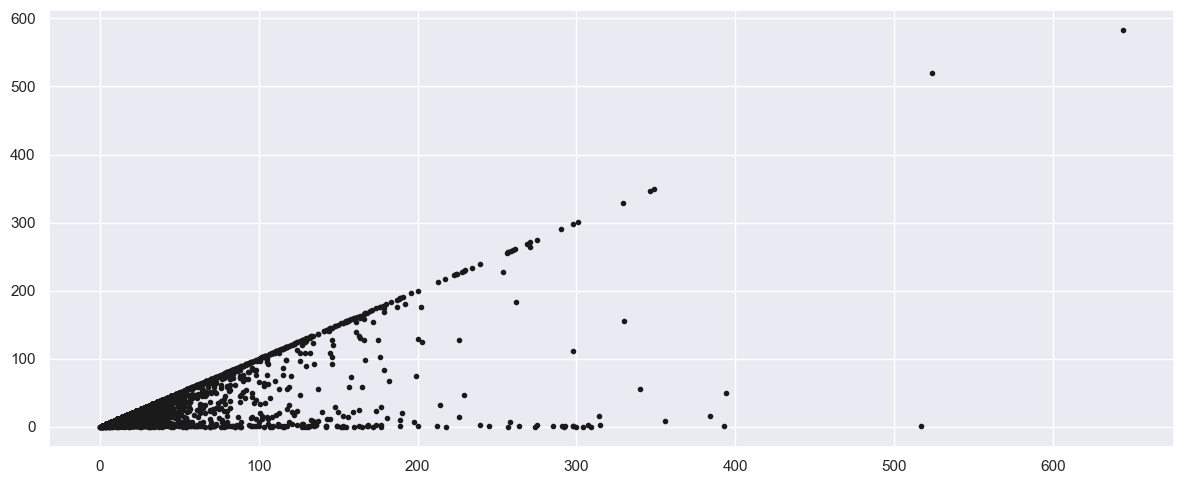

In [84]:
plt.figure(figsize=(12, 5))

plt.scatter([item[0] for item in lista_pasajeros], [item[1] for item in lista_pasajeros], marker= ".", color='k')

plt.tight_layout()
plt.show()

En este gráfico de dispersión podemos ver que la cantidad de pasajeros y de víctimas es proporcional. Es decir que cuando aumenta la cantidad de pasajeron, también aumenta la cantidad de víctimas.